In [30]:
from IPython.html.services.config import ConfigManager
from IPython.paths import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'none',
              'font': "tahoma",
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'width': 1138
})

{'font': 'tahoma',
 'height': 768,
 'start_slideshow_at': 'selected',
 'theme': 'none',
 'transition': 'zoom',
 'width': 1138}

### <center>print("helloworld")</center>

<br>

<small><b>Paras Sharmaa</b></small>

<small>August 1, 2017<small>

1. Artificial Intelligence
+ Create an A.I Model in Python
+ Embed A.I Model into an Application: **Angular & Flask**


## <center>1. Artificial Intelliegence <center>

<img src="images/ai_ml_dl.png">

<center><img src="images/data-science-venn.jpg"></center>

#### Deep Learning
<img src="images/image.jpg">


+ **Artificial Intelligence** refers to techniques that help computers accomplish goals
+ **Machine Learning** refers to techniques that help computers accomplish goals by learning from data
+ **Deep Learning** refers to techniques that help computers accomplish goals by using deep neural networks to learn from data

<center><img src="images/google-ai.jpg" height="300" width="400"></center>

#### <center>Perceptron
<img src="images/perceptron.png">
</center>

#### <center>Network of Perceptron make a Neural Network
<img src="images/nn_net.png">
</center>

<center> 
<img src="images/deep_nn_net.png">
<br>
Multiple hidden layers makes up a Deep Neural Network
</center>

## <center>2. Text Classification Model using Deep Neural Nets</center>

Classifying a piece of text into different categories:
+ Business
+ Entertainment 
+ Health
+ Politics 
+ Sports 
+ Technology

### Steps
+ Collect Datasets
+ Preprocess Data
+ Extract Features
+ Train N.N on the features
+ Evaluate Accuracy
+ Predict on New Data

In [39]:
# 
import os
import re
import glob
import random
import pickle

# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer



# Required to build N.N
import numpy as np
import tflearn
import tensorflow as tf

### 1. Data Collection

+ Already Available Datasets
+ Social Media
+ **Web Scraping**

### 2. Data Preprocessing

In [33]:
raw_data_path = "_data/raw/"
raw_files = glob.glob(raw_data_path+"*.txt")

print(raw_files)

['_data/raw/technology.txt', '_data/raw/health.txt', '_data/raw/business.txt', '_data/raw/entertainment.txt', '_data/raw/sports.txt', '_data/raw/politics.txt']


In [77]:
words = []
documents = []
stp = stopwords.words('english')
classes = []
stemmer = LancasterStemmer()

In [79]:
for f in raw_files:
    t = open(f).read()
    for p in t.split('\n'):
            p = re.sub(r'[^\w\s]','',p)
            p = re.sub('\d', '', p)
            p = [i.lower() for i in list(set(nltk.word_tokenize(p)) - set(stp))]
            words.extend(p)
            documents.append((p, f[10:-4]))
            if f[:-4] not in classes:
                classes.append(f[10:-4])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words]

words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

In [75]:
len(words)

6696

In [76]:
len(documents)

4036

In [50]:
classes

['business', 'entertainment', 'health', 'politics', 'sports', 'technology']

### 3. Features Extraction

In [81]:
training = []
output = []

output_empty = [0] * len(classes)

### Popular Algorithms:

+ Bag of Words or BOW (**We will be using**)
+ BOW + TfIDF (**Term Frequency inverse Document Freq**)
+ Word2Vec (**Invented by Google Researcher Mikolov in 2014**)

<br>
<br>

You can use Sci-Kit learn for using these algorithms. But here we will be doing it from scratch.

### Bag of word:

#### Text Representation
1. I like winters not summers.
2. He likes winters and summers.

#### Vector Representation:
``` python
all_words = ['i', 'like', 'winters', 'he', 'and', 'not', 'summers'] 

[  
    [1, 0, 1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 0, 1]
]

```

In [82]:
#bag of words for each sentence

for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [86]:
# shuffling very important
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [85]:
## This is how one vector looks like
training[0]

array([ [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Training D.N.N

In [87]:
# reset underlying graph data
tf.reset_default_graph()

# Build neural network
net = tflearn.input_data(shape=[None, len(train_x[0])])
net = tflearn.fully_connected(net, 200)
net = tflearn.fully_connected(net, 200)
net = tflearn.fully_connected(net, len(train_y[0]), activation='softmax')
net = tflearn.regression(net)

# Define model and setup tensorboard
model = tflearn.DNN(net, tensorboard_dir='tflearn_logs')
# Start training (apply gradient descent algorithm)
model.fit(train_x, train_y, n_epoch=10, batch_size=32, show_metric=True)

Training Step: 2529  | total loss: 0.04478 | time: 17.184s
| Adam | epoch: 010 | loss: 0.04478 - acc: 0.9944 -- iter: 8064/8072
Training Step: 2530  | total loss: 0.04058 | time: 17.246s
| Adam | epoch: 010 | loss: 0.04058 - acc: 0.9949 -- iter: 8072/8072
--


### Let's Make Prediction

In [88]:

def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words


In [90]:

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))


In [89]:
def classify(sentence):
    # generate probabilities from the model
    results = model.predict([bow(sentence, words)])[0]
    
    # filtering
    results = [[i,r] for i,r in enumerate(results)]
    # sorting
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))

    return return_list

#### Some prediction results

In [105]:
import matplotlib.pyplot as plt

def plot_classification(s):
    r = classify(s)
    plt.bar(range(len(r)), [i[1] for i in r])
    plt.xticks(range(len(r)), [i[0] for i in r], rotation=90)
    plt.show()

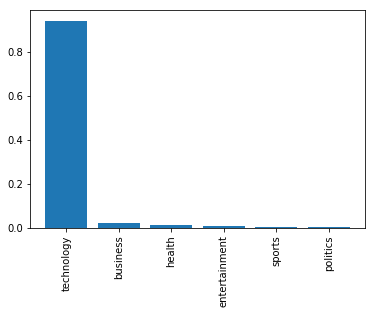

In [106]:
plot_classification("Tesla unviels Model 3 at $ 35,000")

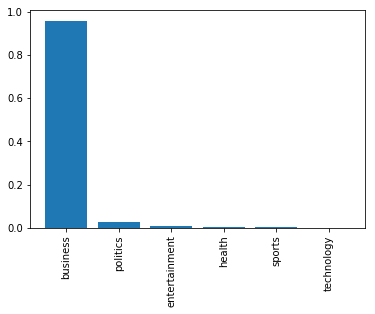

In [110]:
plot_classification("China to invest $150 Billion")

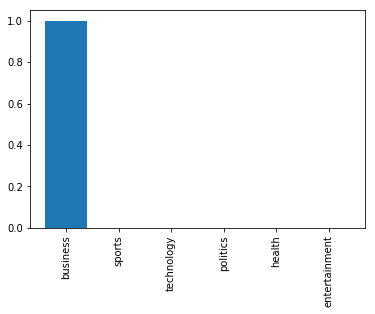

In [108]:
plot_classification("Tesla Stock prices increases")

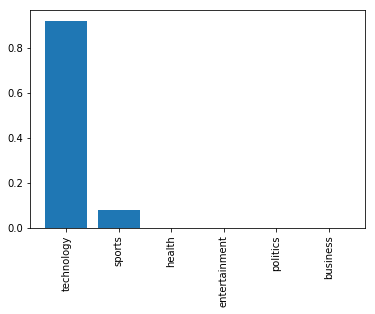

In [111]:
plot_classification("One plus 5 has got best camera")

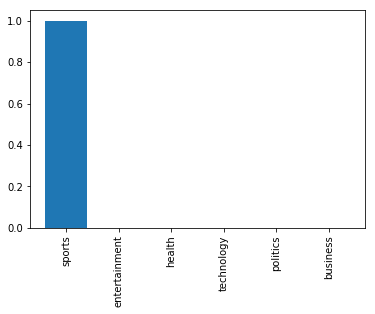

In [118]:
plot_classification("Hockey is national game of india")

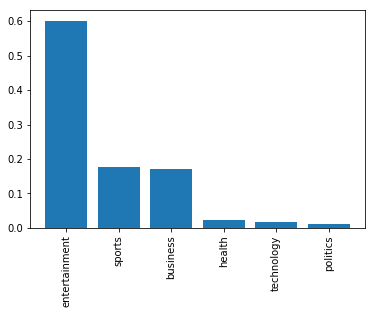

In [124]:
plot_classification("Selena Gomez just celebrated her birthday")

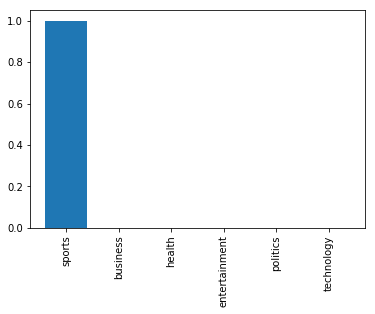

In [126]:
plot_classification("Cricket")

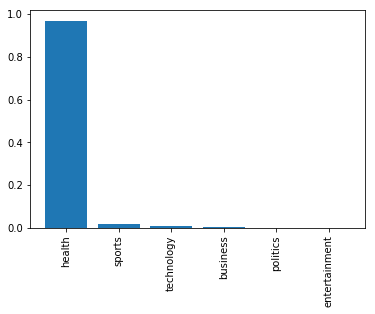

In [128]:
plot_classification("Common cold has no cure")

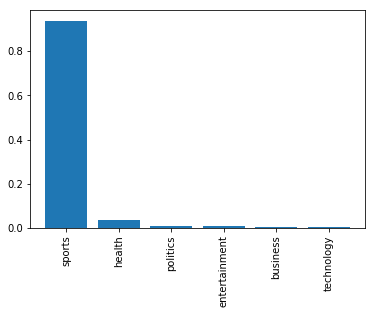

In [130]:
plot_classification("Virat Kohli")

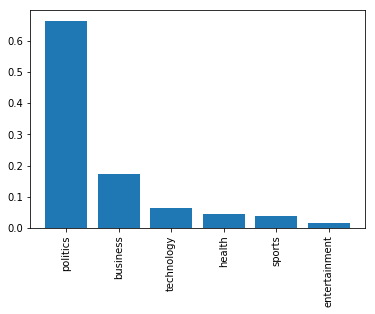

In [131]:
plot_classification("Narendra Modi")

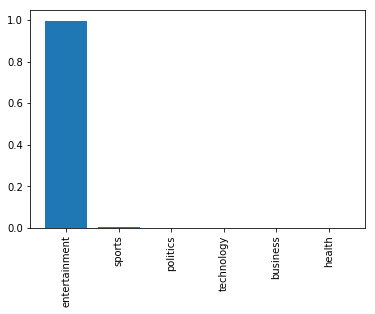

In [136]:
plot_classification("Everybody is watching Game of Thrones")

### Neural Network are not always efficient!
 
>There performance directly depends upon amount of training data.

If less data is provided they can misbehave.

## <center>Embedding A.I into an Application</center>

**I embedded this model into 2 Apps:**

+ TweetGenre (App to classify tweets into categories)
+ Book Bot AI (Messenger Bot)

<img src="images/image_tw.jpg">

### TweetGenre:

**Elements of the App:**
+ Follows REST API Model
+ Model run in FLASK Server
+ FrontEnd is created in Angular 4 (JavaScript Framework)
+ Deployed on Heroku

**Architecture:**

<img src="images/twg.png">

Try out the application on http://parazz.me/tweet-genre/

** Trained N.N on intents to create a ChatBot!**

<img src="images/img2.jpg" width="400">

### <center>Connect on twitter @paraZz</center>

**Resources:**
+ Tweet Classifier:**https://github.com/parassharmaa/tweet-classifier**
+ BookBot: **https://m.me/bookbotai/**
+ TweetGenre: **http://parazz.me/tweet-genre/**
+ Presentation: **https://github.com/parassharmaa/**